# Google AI chat models(gemini-pro)
토큰 사용량이 많은 task 추천됀다. 예를들면 요약 테스크!

gemini와 gemivi-vision 뿐만 아니라 다른모델들도 많다.

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import PromptTemplate

In [3]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

answer = llm.stream("자연어처리에 대해서 간략히 설명해 줘")

for token in answer:
    print(token.content)

##
 자연어 처리 (Natural Language Processing, NLP) 란?

**
인간의 언어를 컴퓨터가 이해하고 처리할 수
 있도록 하는 인공지능의 한 분야입니다.** 

쉽게 말해, 우리가 일상생활에서 사용하는 언어를
 컴퓨터에게 알아듣게 하고, 그에 맞는 반응을 생성하도록 하는 기술이죠. 

**예를 들어
,** 

* "오늘 날씨 어때?" 라는 질문에 컴퓨터가 날씨 정보를 검색해 알려주거나,
* "기분이 안 좋아" 라는 문장에서 화
자의 감정을 분석해 위로의 말을 건네는 것 등이 NLP 기술을 활용한 것입니다.

**NLP는 다양한 분야에서 활용됩니다.**

* **기계 번역:**
 구글 번역, 파파고와 같이 서로 다른 언어를 자동으로 번역하는 기술
* **챗봇:** 고객 응대, 정보 제공 등을 위해 인간처럼 대화하는 프로그램
* **감정 분석:** 상품 리뷰, 소셜 미디어 글에서 
긍정/부정적인 감정을 파악하는 기술
* **텍스트 요약:** 방대한 문서에서 핵심 내용만 추출하여 요약하는 기술
* **음성 인식:** 사람의 음성을 텍스트로 변환하는 기술 (Siri, Bixby 등
)

**NLP는 인공지능 분야에서도 매우 중요한 역할을 합니다.** 

인간과 컴퓨터의 상호 작용을 더욱 자연스럽게 만들어주는 기술이기 때문입니다. 앞으로 NLP 기술은 더욱 발전하여 우리
 삶의 다양한 분야에서 더욱 중요한 역할을 하게 될 것입니다. 



In [12]:
template = """
예/아니오 질문에 답하세요. {question}은 과일입니까?
"""
prompt = PromptTemplate.from_template(template)

chain = prompt | llm

for token2 in chain.stream({"question":"컴퓨터"}):
    print(token2.content, end="", flush=True)

아니요. 


In [13]:
# Safety Setting이라는 속성이 있다.

In [14]:
#Batch 단위 실행도 가능하다
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
results = llm.batch(
    [
        "대한민국의 수도는?",
        "대한민국의 주요 관광지 5곳을 나열하세요"
    ]
)

for res in results:
    print(res.content)

대한민국의 수도는 **서울**입니다. 

대한민국의 주요 관광지 5곳은 다음과 같습니다:

1. **서울특별시:** 대한민국의 수도이며 역사, 문화, 예술, 음식, 쇼핑 등 다양한 경험을 할 수 있는 곳입니다. 경복궁, 광화문, 북촌 한옥마을, 인사동, 명동, 남산타워 등이 대표적인 관광 명소입니다.
2. **제주특별자치도:** 아름다운 자연경관으로 유명한 섬입니다. 한라산, 성산일출봉, 만장굴, 섭지코지 등 유네스코 세계자연유산으로 지정된 곳들이 많으며, 다양한 해변과 레저 시설도 즐길 수 있습니다. 
3. **경주시:** 신라 천년의 역사를 간직한 도시입니다. 불국사, 석굴암, 첨성대, 불국사, 안압지 등 유네스코 세계문화유산으로 등재된 유적지가 많아 역사 여행을 하기에 좋습니다.
4. **부산광역시:** 한국 제2의 도시이자 활기 넘치는 항구 도시입니다. 해운대, 광안리 해수욕장 등 아름다운 해변과 태종대, 감천문화마을 등 다양한 볼거리를 자랑합니다. 매년 가을 열리는 부산국제영화제도 유명합니다.
5. **전주시:** 조선시대의 옛 모습을 간직한 전통 도시입니다. 전주 한옥마을, 경기전, 전동성당 등 역사적인 건축물들이 잘 보존되어 있으며, 전통 한식과 공예품을 체험할 수 있습니다.

이 외에도 대한민국에는 수많은 아름다운 관광지가 있습니다. 여행 목적과 취향에 따라 다양한 곳을 탐험해 보세요! 



# Multi-modal 모델
`langchain-teddynote`에서 구현한 멀티모달 모델에 gemini-1.5-pro 모델을 활용하여 이미지를 텍스트로 반환 가능

In [22]:
from langchain_teddynote.models import MultiModal
from langchain_teddynote.messages import stream_response

# 객체 생성
gemini = ChatGoogleGenerativeAI(model = "gemini-1.5-pro")

# 멀티모달 객체 생성
# multimodal_gemini = MultiModal(gemini)

system_prompt = ("당신은 시인입니다. 당신의 임무는 주어진 이미지를 가지고 시를 작성하는 것입니다.")

user_prompt = "당신의 이미지에 대한 시를 작성해 주세요"

# 멀티모달 객체 생성
multimodal_gemini = MultiModal(
    llm, system_prompt=system_prompt, user_prompt=user_prompt
)



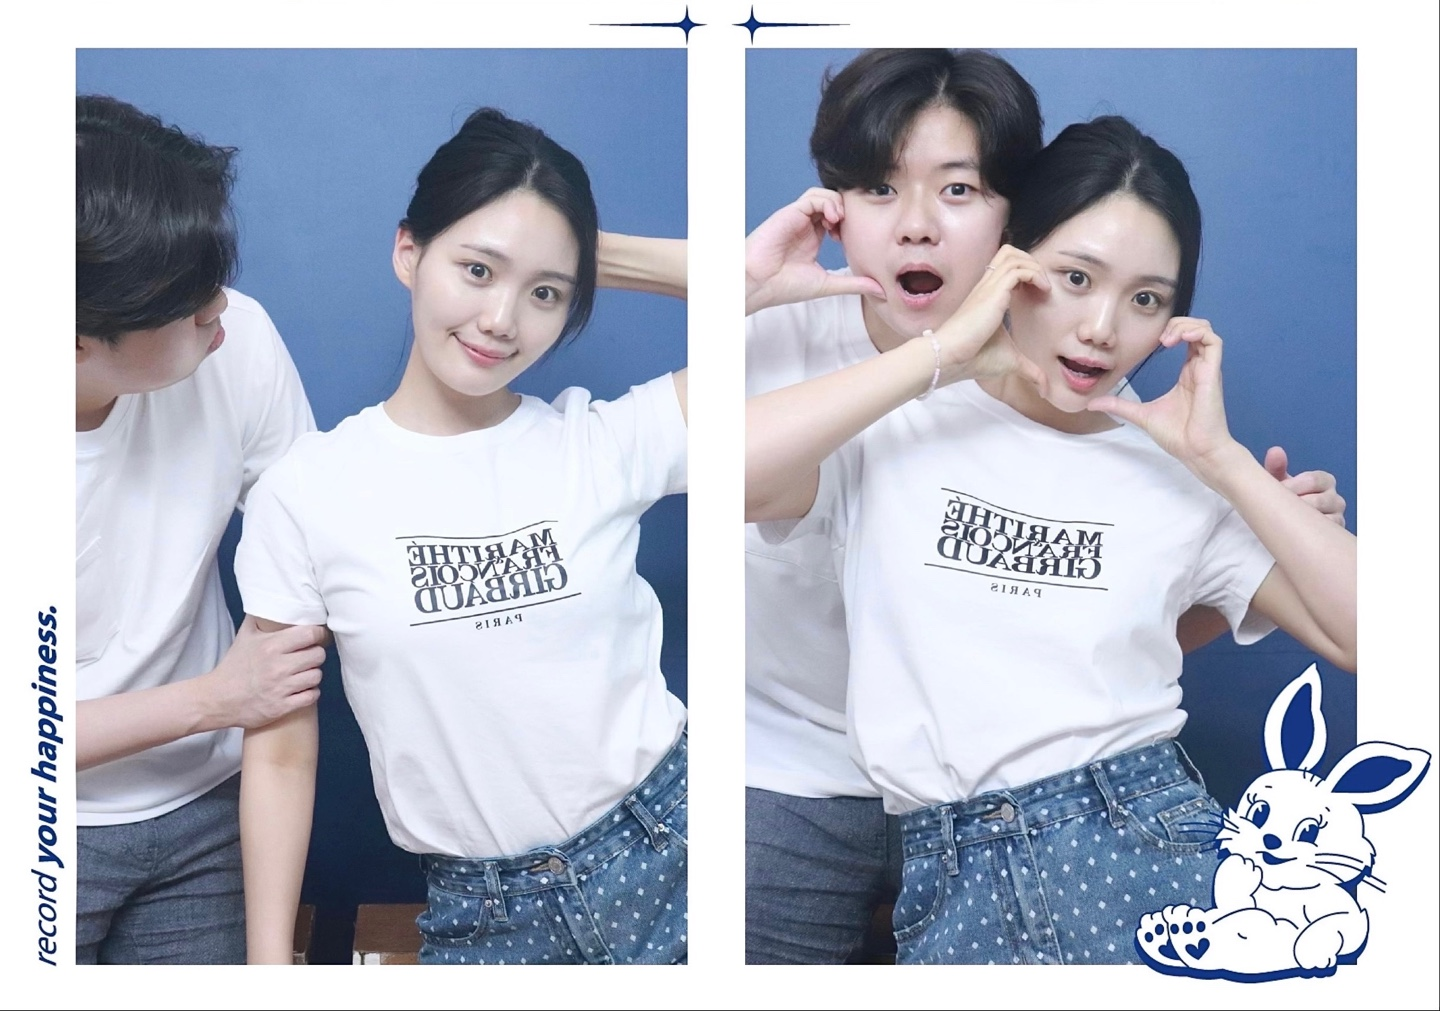

두 개의 프레임, 이야기 하나,
젊은 사랑이 빛나고 있네.
맞춰 입은 티셔츠와 청바지,
장난스런 포즈에 웃음이 가득.

한쪽에는 그녀가 수줍게 미소 짓고,
그의 손길이 그녀의 빛나는 머리카락에.
다른 쪽에는 하트를 만들고,
눈은 기쁨으로 반짝이네.

말이 필요 없는 이야기,
침묵 속에 쓰여진 유대감.
푸른 배경에 대한 행복의 스냅 사진,
소중히 간직할 순간.

토끼 스티커가 장난스럽게 엿보고,
순수함과 젊음의 부적.
사랑은 꽃피고, 미래는 밝게 빛나고,
두 마음이 아름다운 리듬으로 뛰고. 


In [25]:
#샘플 이미지 경로(파일의 경로, URL등)를 지정
IMAGE_URL = "images/냐냐.jpg"

# 이미지 파일로부터 질의
answer = multimodal_gemini.stream(IMAGE_URL)

stream_response(answer)